<a href="https://colab.research.google.com/github/ashithamudraje/eda-car-features/blob/master/EDA_of_car_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Importing Necessary Libraries
Importing libraries such as pandas,numpy,seaborn etc.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
%matplotlib inline

# Reading data
Reading data is possible by using Pandas library read_csv.read_csv is an important pandas function to read comma separted value files and do operations on it.







In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data (1).csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# 1.1 Check Datatype
Checking Datatype is possible using info().This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [ ]:
#1.1 check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# 1.2 Statistical Summary
The describe() function computes a summary of statistics pertaining to the DataFrame columns.This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns.


In [ ]:
#1.2 statistical summary
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#1.3 Shape
The shape attribute of pandas.DataFrame stores the number of rows and columns as a tuple

In [ ]:
#1.3 shape
df.shape

(11914, 16)

# 1.4 Null Values
isnull(). sum() will give the column-wise sum of missing values. This returns the counts of non-NA, NA and total number of entries per group

In [ ]:
#1.4 null values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# 2. Dropping less relevance columns
Pandas provide a way to delete and filter data frame using .drop() method. Rows or columns can be removed using index label or column name using this method.By dropping columns  reduce memory usage without changing any of your processing code.


In [ ]:
#2 Dropping less relevance columns
df.drop(['Engine Fuel Type','Number of Doors','Market Category'],axis=1,inplace=True)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#3. Renaming Dataframe columns
Renaming dataframe columns is necessary in order to avoid confusion between columns

In [ ]:
#3 renaming dataframe columns
df = df.rename(columns = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission  Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df 


,Make,Model,Year,HP,Cylinders,Transmission Type,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


# 4.1 Check and Remove Duplicates In The Data
Drop duplicate rows in pandas python using drop_duplicate() function.It
drops the duplicate rows in pandas by retaining last occurrence.
Dropping duplicate in pandas by a specific column name.

In [ ]:
#4.1 check and remove duplicates in the data
df.duplicated().sum()
df.drop_duplicates(keep='first',inplace=True)
df.shape

(11122, 13)

# 4.2 Check and Remove Null values and Missing data
Handling missing data is important as many machine learning algorithms do not support data with missing values.Sometimes csv file has null values, which are later displayed as NaN in Data Frame. Pandas dropna() method allows the user to analyze and drop Rows/Columns with Null values in different ways.




In [ ]:
#4.2 check and remove null values and missing data
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.isnull().sum()
df.shape

(11024, 13)

#5. Check and Remove for Outliers 
An outlier is a data point that lies outside the overall pattern in a distribution. Checking of outliers is possible by ploting BOXPLOT.Here it shows that HP and Price have more outliers data.In order to remove those outliers we use IQR techinque.IQR is just the width of the box in the box-and-whisker plot. That is, IQR = Q3 – Q1 . The IQR can be used as a measure of how spread-out the values are.Statistics assumes that your values are clustered around some central value. The IQR tells how spread out the "middle" values are; it can also be used to tell when some of the other values are "outliers" from the central value.An outlier is any value that lies more than one and a half times the length of the box from either end of the box.After IQR techinque we remove those outliers data which are not within range.Hence there would be reduce in rows of DataFrame.


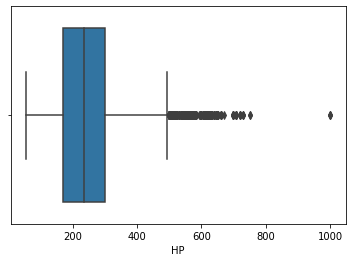

In [ ]:
sns.boxplot(x=df['HP'])

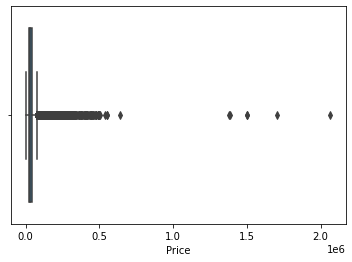

In [ ]:
sns.boxplot(x=df['Price'])

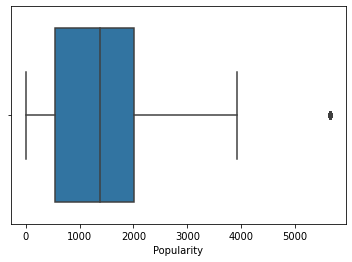

In [ ]:
sns.boxplot(x=df['Popularity'])

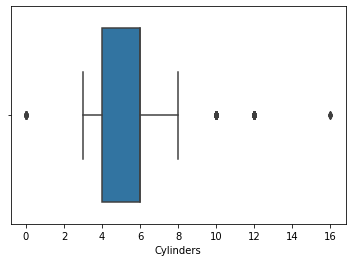

In [ ]:
sns.boxplot(x=df['Cylinders'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
IQR

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64

In [ ]:
df = df[~((df<(Q1-1.5 * IQR))|(df>(Q3+1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)

# 6.1 Most Represented Car Brands
Here we can see that CHEVROLET is the most represented car brand among top 10 of car brands.

In [ ]:
#top 10 most represented car brands
df.iloc[:,0].value_counts()[:10]

Chevrolet     1027
Toyota         569
Volkswagen     515
Nissan         513
GMC            469
Dodge          425
Mazda          378
Honda          373
Suzuki         339
Infiniti       322
Name: Make, dtype: int64

In [ ]:
#Percentage of top 10 most represented car brands
counts = (df['Make'].value_counts()*100)[:10]/sum(df['Make'].value_counts())
counts

Chevrolet     12.017318
Toyota         6.658086
Volkswagen     6.026211
Nissan         6.002808
GMC            5.487948
Dodge          4.973087
Mazda          4.423122
Honda          4.364615
Suzuki         3.966768
Infiniti       3.767845
Name: Make, dtype: float64

# 6.2 The Average Price among the top Car Brands
Here CHEVROLET has maxmium average price among top car brands.

In [ ]:
mean_prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Mazda')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Suzuki')|
               (df['Make'] == 'Infiniti')].groupby('Make').mean()
mean_prices

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Infiniti,43127.822981
Mazda,20495.820106
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793


# 7. Correlation Matrix
Correlation can be an important tool for feature engineering in building machine learning models.Correlation is a measure of how strongly one variable depends on another.

In [ ]:
b=df.corr()
b

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


# High correlation 
**Price and HP**

As price increase there is increas in horsepower.So higher price of car has more horsepower.

#Negative Correlation
**Cylinders and MPG-C**

More number of cylinders leads to decrease in city MPG.Lower MPG requires high fuel consumption rate. 

# 8. Plotting different Graphs
**8.1 Heatmap**

It turns out that generating a heat map of all the feature variables where feature variables as row headers and column headers, and the variable vs itself on the diagonal.It is extremely powerful way to visualize relationships between variables in high dimensional space.
A correlation matrix with heat map coloring is also possible.

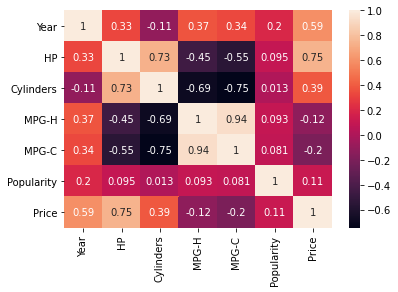

In [ ]:
sns.heatmap(b,annot=True)

**8.2 Scatter plot**

Scatter plots shows how much one variable is affected by another or the relationship between them with the help of dots in two dimensions. Scatter plots are very much like line graphs in the concept that they use horizontal and vertical axes to plot data points.
Here we can see as price increases there is increase in Horsepower.

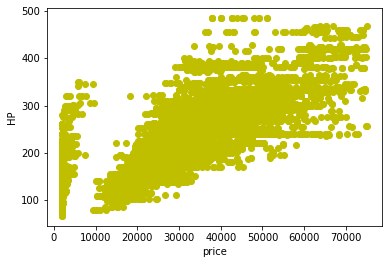

In [ ]:
plt.scatter(df['Price'],df['HP'],color='y')
plt.xlabel('price')
plt.ylabel('HP')
plt.show()

**8.3 Bar Plot**

A bar chart or graph is a graph with rectangular bars or bins that are used to plot categorical values. Each bar in the graph represents a categorical variable and the height of the bar is proportional to the value represented by it.
Here we can see as there is increase in cylinders there is also increase in horsepower and as increase in MPG leads to decrease in horsepower.

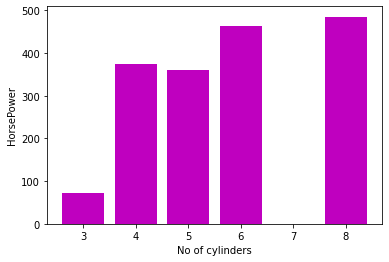

In [ ]:
plt.bar(df['Cylinders'],df['HP'],color='m')
plt.xlabel('No of cylinders')
plt.ylabel('HorsePower')
plt.show()

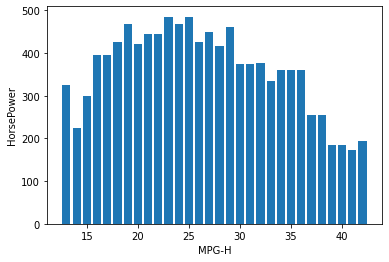

In [ ]:
plt.bar(df['MPG-H'],df['HP'])
plt.xlabel('MPG-H')
plt.ylabel('HorsePower')
plt.show()

# Data Preprocessing
Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

Scaling is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [ ]:
le = preprocessing.LabelEncoder()
scale = preprocessing.StandardScaler()
for value in df:
  if df[value].dtype==object:
    df[value] = le.fit_transform(df[value])
df = scale.fit_transform(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In this step X contains Feature variables and y contains Target variables.The target variable is Price.

In [ ]:
X = df[:,:-1]
y = df[:,-1]
X, y

(array([[-1.28350756, -1.64434287, -0.04159785, ..., -0.13111318,
         -0.1091675 ,  3.13678811],
        [-1.28350756, -1.64945719, -0.04159785, ...,  0.22313697,
         -0.1091675 ,  3.13678811],
        [-1.28350756, -1.64945719, -0.04159785, ...,  0.22313697,
          0.12164533,  3.13678811],
        ...,
        [-1.54500492,  1.60325116,  0.11682248, ..., -0.66248839,
         -0.80160602, -1.15720694],
        [-1.54500492,  1.60325116,  0.27524281, ..., -0.66248839,
         -0.80160602, -1.15720694],
        [ 0.11114505,  1.60836548, -0.8336995 , ..., -0.13111318,
         -0.57079318, -1.32262755]]),
 array([ 1.00619211,  0.64395311,  0.35997359, ...,  1.30238935,
         1.32220187, -0.12576347]))

# 9.Split the Dataset and build Model
In this step we split the dataset into 80 and 20.i.e test size is 20%,keeping random state as 42 and price as traget variable.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

**9.1 Support Vector Machine**

In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [ ]:
regr = svm.SVR()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
y_pred


array([-1.25577297, -1.64875622,  0.44605186, ...,  0.37737543,
       -0.6340004 ,  0.81167752])

In [ ]:
regr.score(X_test,y_test)

0.8777391236634394

Text(0, 0.5, 'Predicted values')

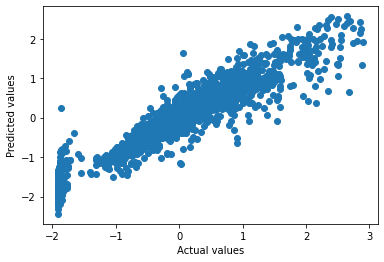

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# 9.2  R Square
R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

r2 = 1- (SSres/SStot ),
Where SSres is the residual sum of squares and SStot is the total sum of squares.

Here we can see the value of r2 is 0.87 i.e model is fitted better.

In [ ]:
r2 = r2_score(y_test,y_pred)
print('R square value is: ',r2)

R square value is:  0.8777391236634394


# 9.3 Root-Mean-Square Error 
RMSE is used in machine Learning when we want to look at the accuracy of our model we take the root mean square of the error that has occurred between the test values and the predicted values mathematically.It is always non – negative and values close to zero are better.It measures of how well a regression line fits the data points. RMSE can also be construed as Standard Deviation in the residuals.


In this case the RMSE value is 0.35 hence the regression line fit the data points.

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
print('Root mean square error value is: ',rmse)

Root mean square error value is:  0.35243408771234486


# 9.4 Mean Absolute Error
Mean Absolute Error (MAE) refers to a the results of measuring the difference between two continuous variables.In Machine Learning, MAE is a model evaluation metric often used with regression models.It is absolute difference between the actual or true values and the values that are predicted.

MAE = True values – Predicted values
In this case the MAE is 0.24

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error value is: ',mae)

Mean absolute error value is:  0.24274448895758752


# 10.1 Apply Different Algorithm
****

**Decision Tree Algorithm**

In this step we apply Decision Tree Algorithm in order to find y_pred.

Decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. It is one of the most widely used and practical methods for supervised learning. Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks.
Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

After calliing Decision tree algorithm we fit the train data and predict the value of model.


In [ ]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_pred

array([-1.83683915, -1.90697549,  1.66429814, ...,  0.09877847,
       -0.40287465,  1.25483929])

Text(0, 0.5, 'Predicted values')

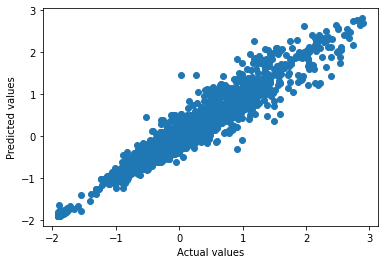

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
regressor.score(X_test,y_test)


0.9386337903184474

Here we can see r squared value of Decision Tree is more than r squared value of SVM.So i conclude that Decision Tree is more accurately fit the model.

In [ ]:
r2 = r2_score(y_test,y_pred)
print('R square value is: ',r2)

R square value is:  0.9386337903184474


In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
print('Root mean square error value is: ',rmse)

Root mean square error value is:  0.24968865200454593


In [ ]:
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error value is: ',mae)

Mean absolute error value is:  0.17421186422153806
